# **PROBLEM STATEMENT**

Here’s an improved version of the problem statement:

---

Breast cancer remains a critical public health issue worldwide, with early and accurate diagnosis being essential for successful treatment and improved patient outcomes. Traditional diagnostic methods, while effective, often involve time-consuming processes and may be subject to human error.

Machine learning provides an innovative approach to enhancing breast cancer diagnosis. By leveraging medical data, such as tumor characteristics, a machine learning model can be trained to accurately predict whether a tumor is benign or malignant. This technology has the potential to facilitate faster and more precise diagnoses, enabling timely medical interventions and ultimately saving lives.

A successful machine learning model could have significant business and healthcare impacts, including:

- **Improved patient outcomes**: Early detection and timely treatment can significantly boost survival rates.
- **Reduced healthcare costs**: Efficient and accurate diagnoses can streamline resource allocation and reduce unnecessary procedures.
- **Enhanced patient experience**: Quicker and more reliable diagnoses can alleviate patient anxiety and improve overall satisfaction.
- **Potential for new medical insights**: Analyzing model predictions could lead to a deeper understanding of breast cancer, potentially uncovering novel patterns and risk factors.

Developing a reliable machine learning model for breast cancer diagnosis can greatly enhance healthcare providers' diagnostic capabilities, leading to better patient care and advancing the field of medical research.


# **OBJECTIVE**
To predict whether a diagnosed breast cancer case is malignant or benign using the Wisconsin dataset from the UCI repository.

# **ABOUT DATASET**
The dataset features are derived from digitized images of fine needle aspirates (FNA) of breast masses. These features capture various characteristics of the cell nuclei present in the images. In the 3-dimensional space, the dataset's features are described by the study:

K. P. Bennett and O. L. Mangasarian, "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets," Optimization Methods and Software, vol. 1, 1992, pp. 23-34.

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# **APPROACH**
We will begin with data analysis to understand the features and distribution of the dataset, followed by data cleaning to handle any missing values, outliers, or inconsistencies. After preprocessing, we will apply various machine learning algorithms, such as logistic regression, decision trees, and support vector machines, to predict the classification of breast cancer cases. We will then evaluate the performance of each model using metrics like accuracy, precision, recall, and F1-score, and compare their results to identify the most effective model. Finally, we will fine-tune the best-performing model to optimize its predictive accuracy.

###Importing Libraries

In [421]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [422]:
df = pd.read_csv('cancer_dataset.csv')

In [423]:
pd.set_option('display.max_columns', None)

In [424]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

###Features Exploratory Data Analysis


For a better result in analysis, we will drop unnecessary like "id" and "Unnamed:32" columns at first

In [426]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [427]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [428]:
df.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


####Uni-variate Analysis

In [429]:
df.concavity_mean.sort_values(ascending=True).head(15)

,concavity_mean
568,0.000000
314,0.000000
538,0.000000
101,0.000000
192,0.000000
473,0.000000
557,0.000000
550,0.000000
174,0.000000
140,0.000000


In [430]:
df['concave points_mean'].sort_values(ascending=True).head(15)

,concave points_mean
568,0.000000
101,0.000000
140,0.000000
174,0.000000
175,0.000000
391,0.000000
192,0.000000
538,0.000000
314,0.000000
473,0.000000


The minimum values for 'concavity_worst' and 'concave points_worst' are zero, which will be highlighted during bi-variate analysis to understand their impact.

In [431]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


No null values are present.

In [432]:
for col in df.columns:
  print(f'{col}:')
  print(df[col].describe())
  print('-'*25)

diagnosis:
count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object
-------------------------
radius_mean:
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64
-------------------------
texture_mean:
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64
-------------------------
perimeter_mean:
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64
-------------------------
area_mean:
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      25

Carefull inspection of every single distribution

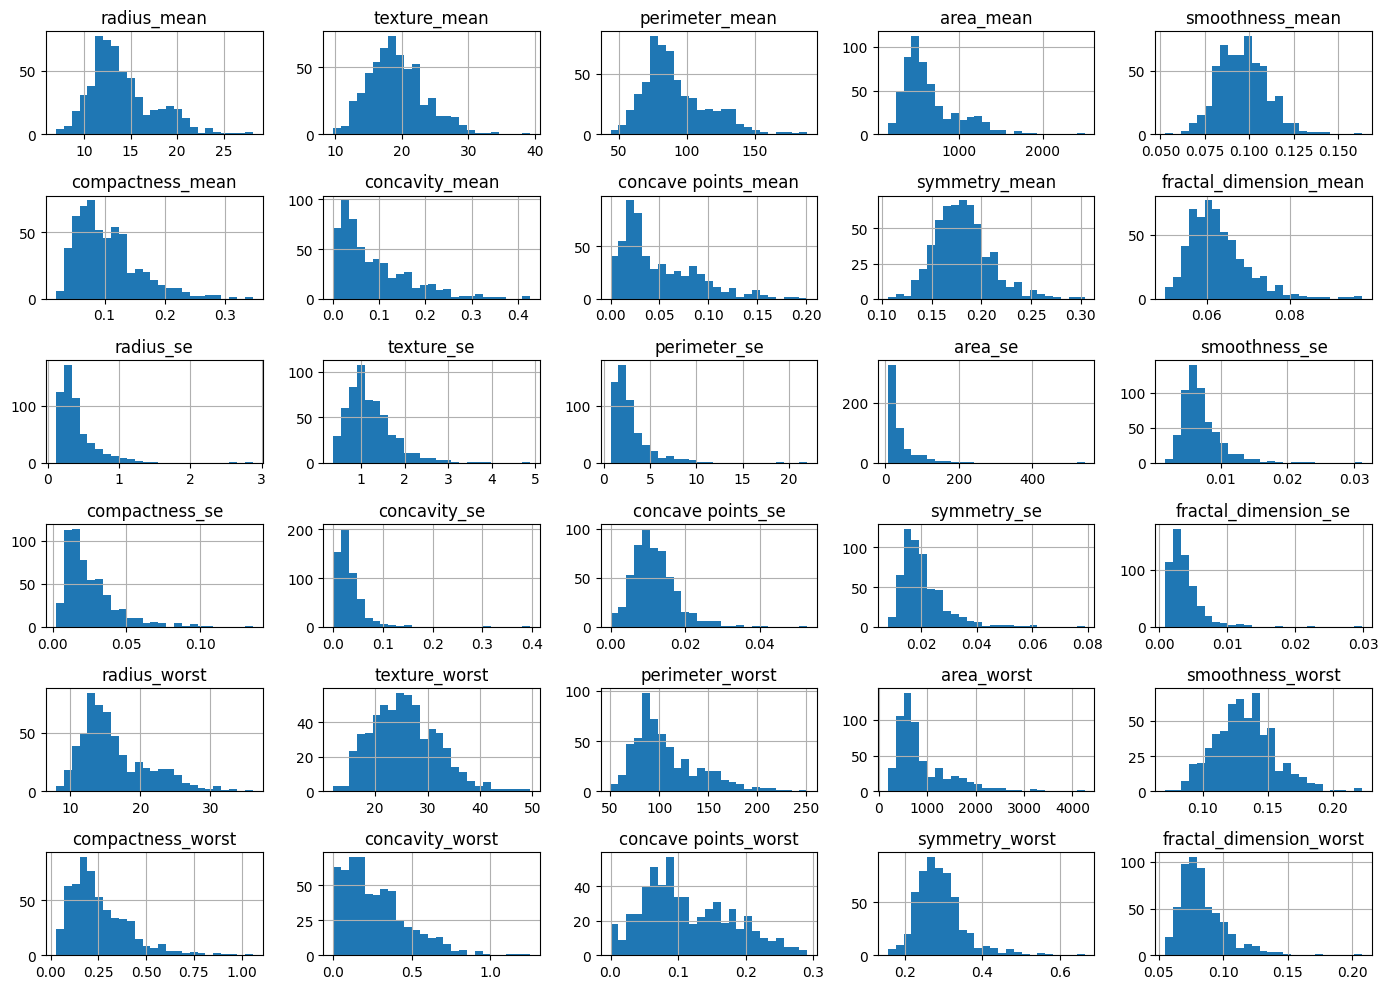

In [433]:
df.hist(bins=25, figsize=(14, 10))
plt.tight_layout()
plt.show()

####Bi-variate Analysis

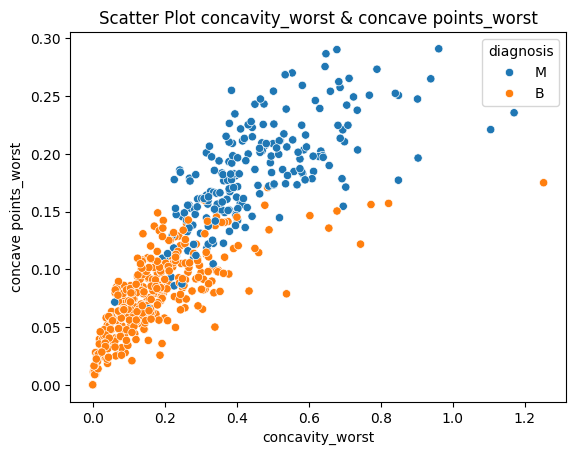

In [434]:
sns.scatterplot(x='concavity_worst', y='concave points_worst', hue='diagnosis', data=df)
plt.title('Scatter Plot concavity_worst & concave points_worst')
plt.show()

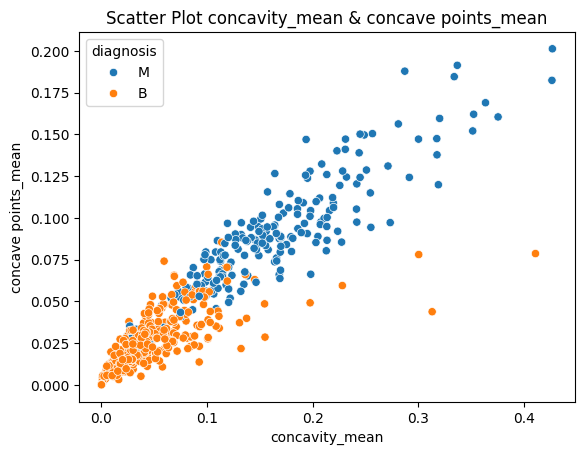

In [435]:
sns.scatterplot(x='concavity_mean', y='concave points_mean', hue='diagnosis', data=df)
plt.title('Scatter Plot concavity_mean & concave points_mean')
plt.show()

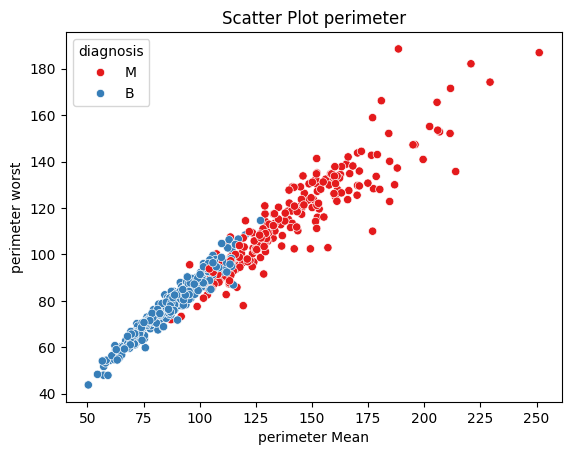

In [436]:
sns.scatterplot(x='perimeter_worst', y='perimeter_mean', hue='diagnosis', data=df, palette='Set1')
plt.xlabel('perimeter Mean')
plt.ylabel('perimeter worst')
plt.title('Scatter Plot perimeter')
plt.show()

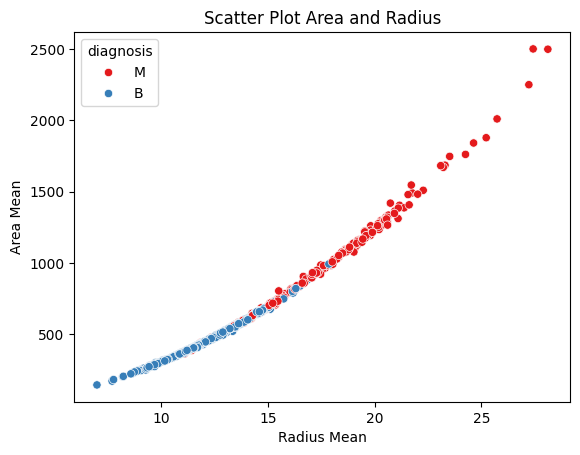

In [437]:
sns.scatterplot(x='radius_mean', y='area_mean', hue='diagnosis', data=df, palette='Set1')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.title('Scatter Plot Area and Radius')
plt.show()

####Multi-variate Analysis

In [438]:
corr_matrix = df.corr(numeric_only=True,method='pearson')

In [439]:
corr_matrix = corr_matrix[corr_matrix > 0.92]  # Adjust the threshold as needed

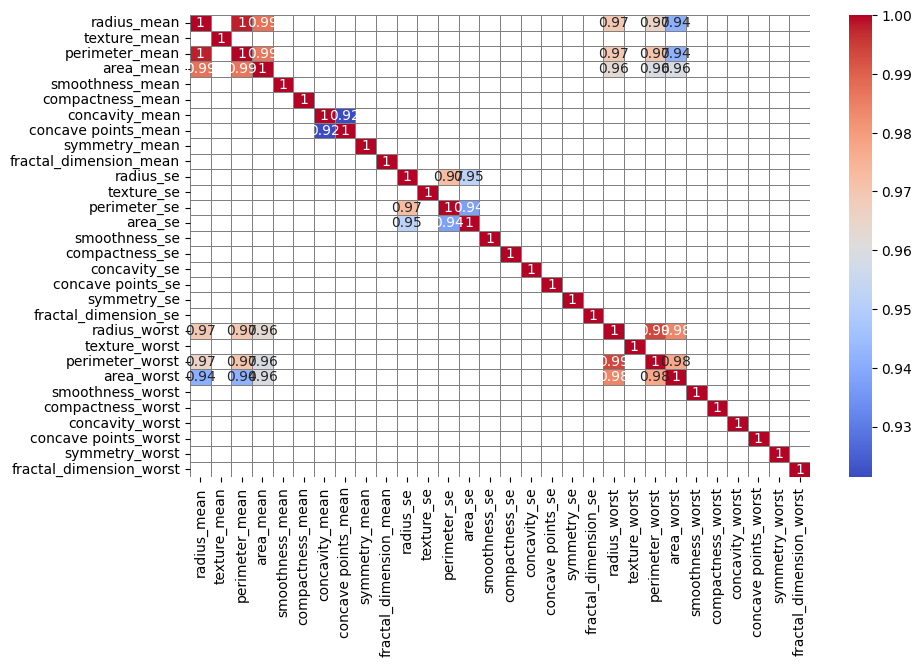

In [440]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=.5, linecolor='gray')
plt.show()

The heatmap reveals the following insights:

- **High Correlation**: Features like radius_mean, perimeter_mean, and area_mean are highly correlated, indicating they change together. Similar patterns are seen in radius_worst, perimeter_worst, and area_worst.
- **Feature Clusters**: Features are grouped into clusters with high correlations, such as the "mean" and "worst" values, suggesting related measurements.
- **Moderate to Low Correlation**: Features like smoothness_mean and fractal_dimension_mean have lower correlations, indicating unique aspects.
- **Feature Redundancy**: High correlations among certain features suggest redundancy, which may affect model building by introducing multicollinearity.
- **No Negative Correlation**: All features generally vary in the same direction with no strong negative correlations observed.

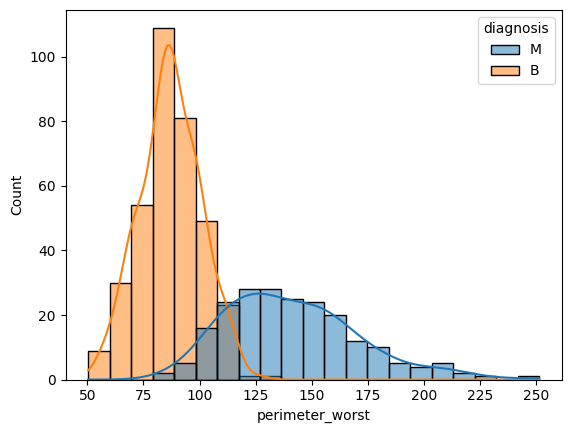

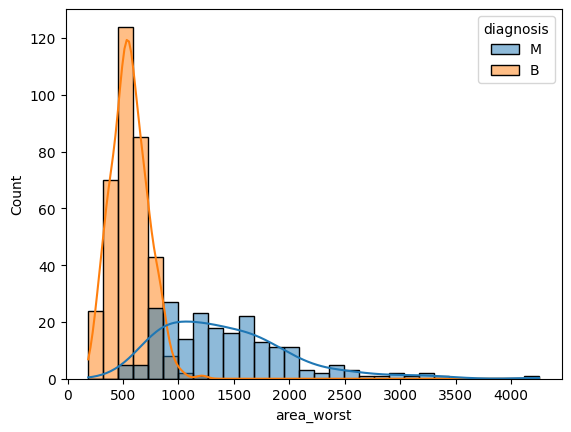

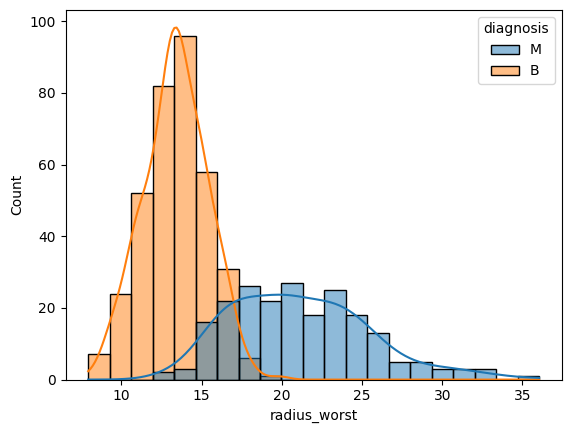

In [441]:
# Histogram with density curve
sns.histplot(data=df, x='perimeter_worst', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='area_worst', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='radius_worst', hue='diagnosis', kde=True)
plt.show()

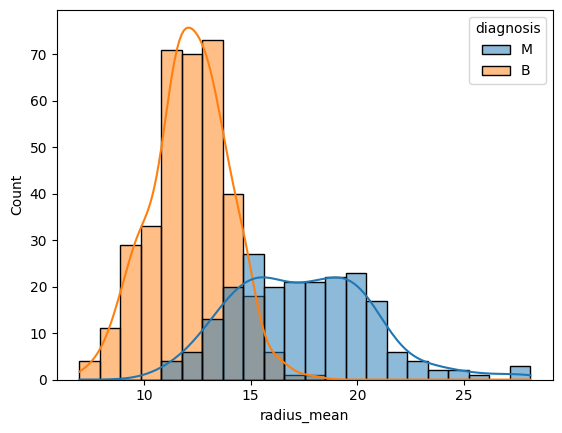

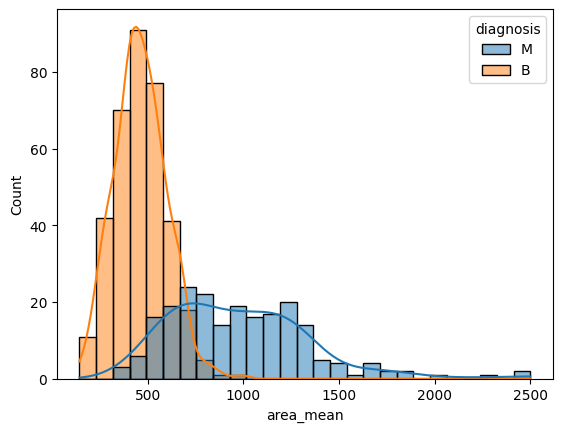

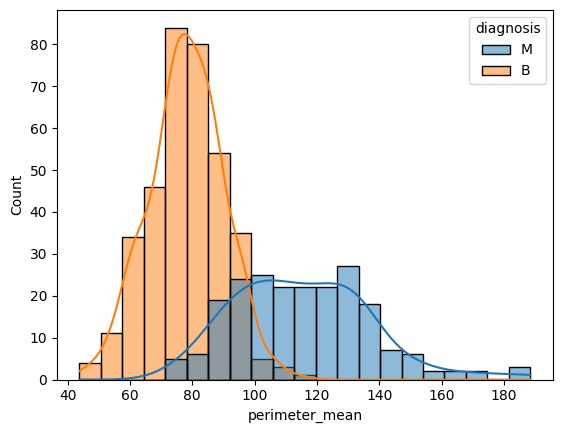

In [442]:
# Histogram with density curve
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='area_mean', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='perimeter_mean', hue='diagnosis', kde=True)
plt.show()

**NOTE**: Highly correlated

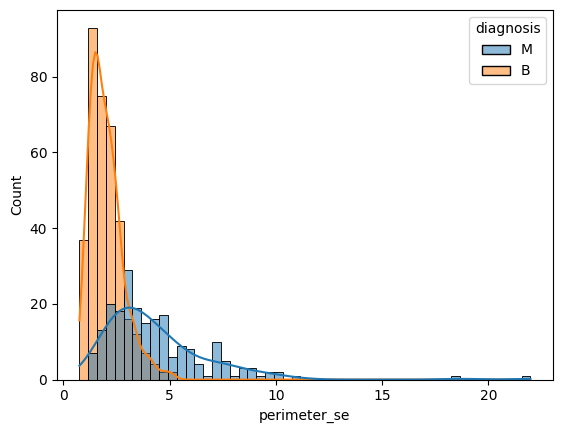

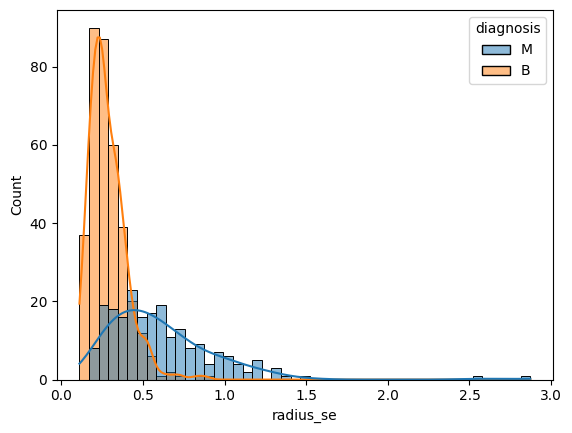

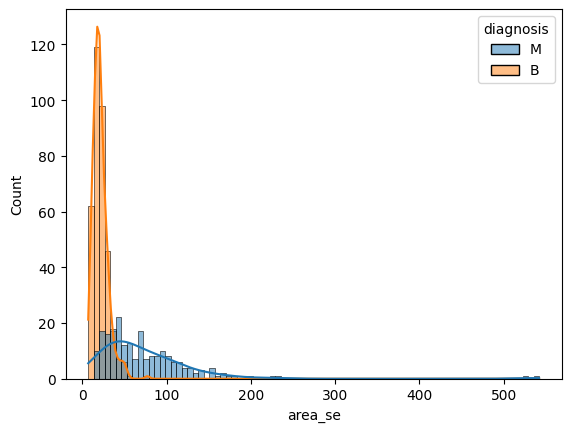

In [443]:
sns.histplot(data=df, x='perimeter_se', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='radius_se', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x= 'area_se', hue='diagnosis', kde=True)
plt.show()

#### Data Cleaning

In [444]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [445]:
# Checking for duplicates:
numerical_columns.duplicated().sum()

0

In [446]:
# Checking for extreme outliers:
def detect_outliers_iqr(df, columns):
  Q1 = df[columns].quantile(0.25)
  Q3 = df[columns].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[columns] < lower_bound) | (df[columns] > upper_bound)].any(axis=1)
  return outliers

In [447]:
# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(df, numerical_columns)
print("Outliers using IQR:\n", outliers_iqr.sum())

Outliers using IQR:
 171


##Feature Engineering

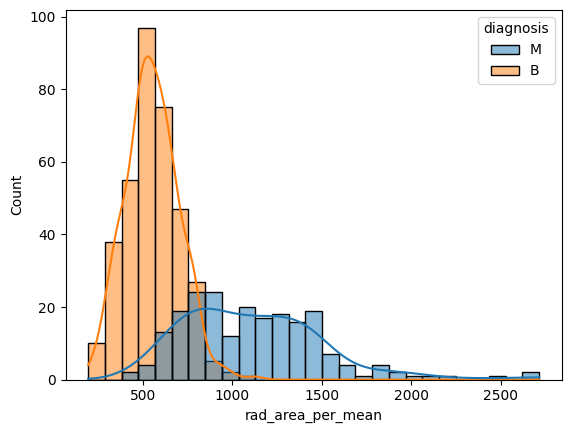

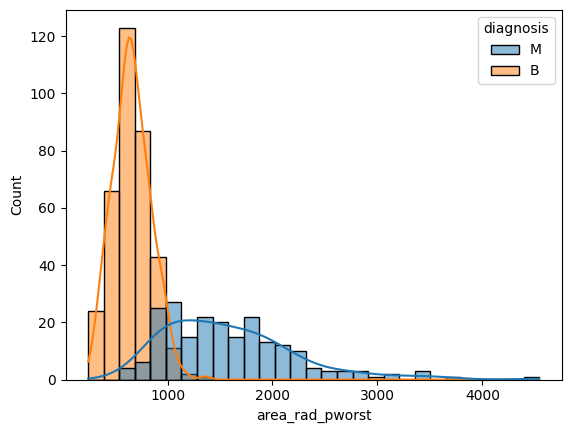

In [448]:
df['rad_area_per_mean'] = df['radius_mean'] + df['area_mean'] + df['perimeter_mean']
df['area_rad_pworst'] = df['perimeter_worst'] + df['area_worst'] + df['radius_worst']
sns.histplot(data=df, x='rad_area_per_mean', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='area_rad_pworst', hue='diagnosis', kde=True)
plt.show()

In [449]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'rad_area_per_mean',
       'area_rad_pworst'],
      dtype='object')

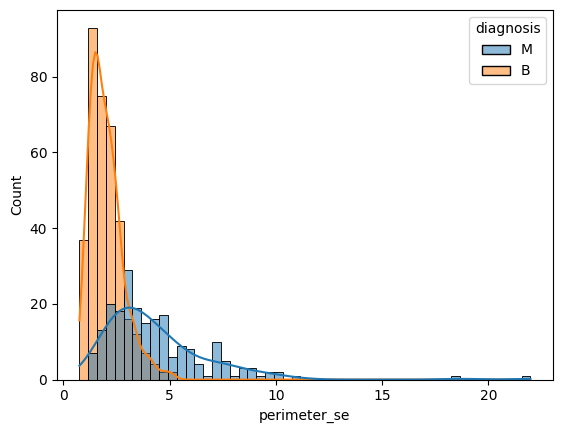

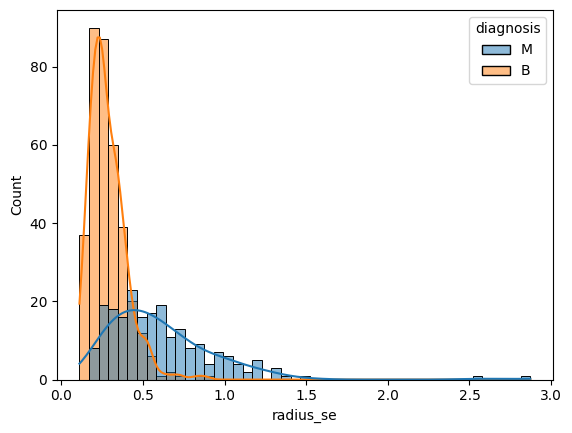

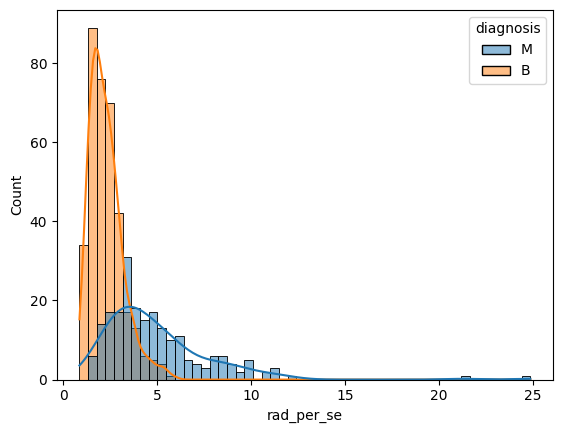

In [450]:
sns.histplot(data=df, x='perimeter_se', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='radius_se', hue='diagnosis', kde=True)
plt.show()
df['rad_per_se'] = df['radius_se'] + df['perimeter_se']
sns.histplot(data=df, x='rad_per_se', hue='diagnosis', kde=True)
plt.show()

Handling Skewed Distributions by using transformation techniques

In [451]:
import scipy.stats as stat
import pylab

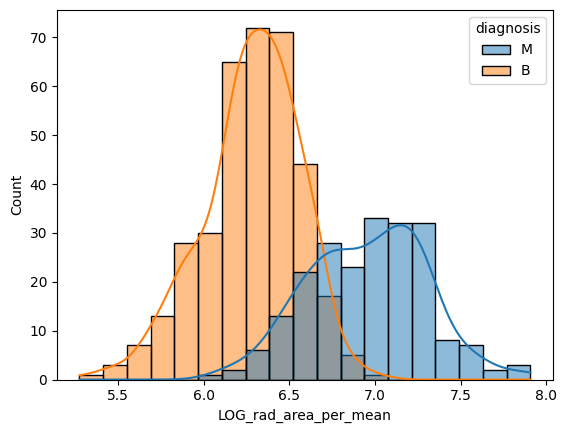

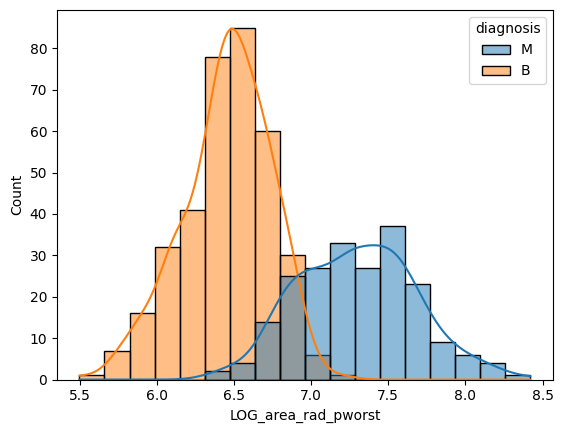

In [452]:
df['LOG_rad_area_per_mean'] = np.log1p(df['rad_area_per_mean'])  # Add 1 to avoid log(0) errors

df['LOG_area_rad_pworst'] = np.log1p(df['area_rad_pworst']) # Add 1 to avoid log(0) errors
sns.histplot(data=df, x='LOG_rad_area_per_mean', hue='diagnosis', kde=True)
plt.show()
sns.histplot(data=df, x='LOG_area_rad_pworst', hue='diagnosis', kde=True)
plt.show()


We will drop these features : df['radius_mean'] & df['area_mean'] & df['perimeter_mean'] & df['rad_area_per_mean'] & df['perimeter_worst'] & df['area_worst'] & df['radius_worst'] & df['area_rad_pworst']


In [453]:
df.drop(['radius_mean', 'area_mean', 'perimeter_mean', 'rad_area_per_mean'], axis=1, inplace=True)
df.drop(['perimeter_worst', 'area_worst', 'radius_worst', 'area_rad_pworst'], axis=1, inplace=True)

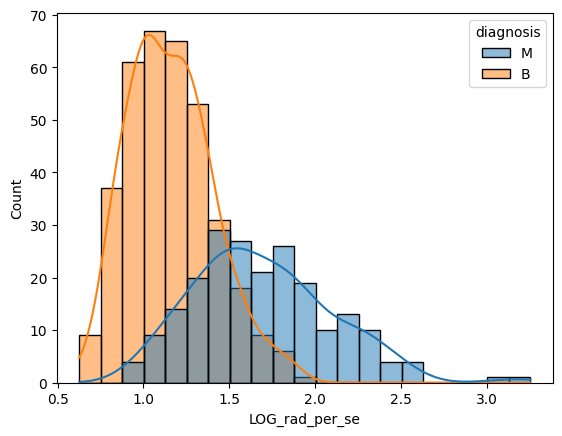

In [454]:
df['LOG_rad_per_se'] = np.log1p(df['rad_per_se'])  # Add 1 to avoid log(0) errors
sns.histplot(data=df, x='LOG_rad_per_se', hue='diagnosis', kde=True)
plt.show()

In [455]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'rad_per_se', 'LOG_rad_area_per_mean',
       'LOG_area_rad_pworst', 'LOG_rad_per_se'],
      dtype='object')

In [456]:
df.drop(['radius_se','perimeter_se', 'rad_per_se'], axis=1, inplace=True)

In [457]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'LOG_rad_area_per_mean',
       'LOG_area_rad_pworst', 'LOG_rad_per_se'],
      dtype='object')

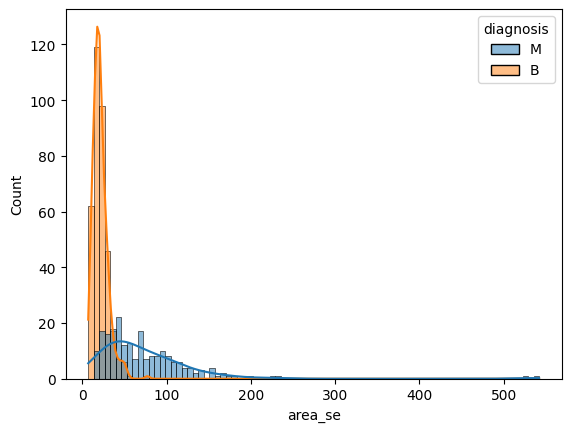

In [458]:
sns.histplot(data=df, x= 'area_se', hue='diagnosis', kde=True)
plt.show()

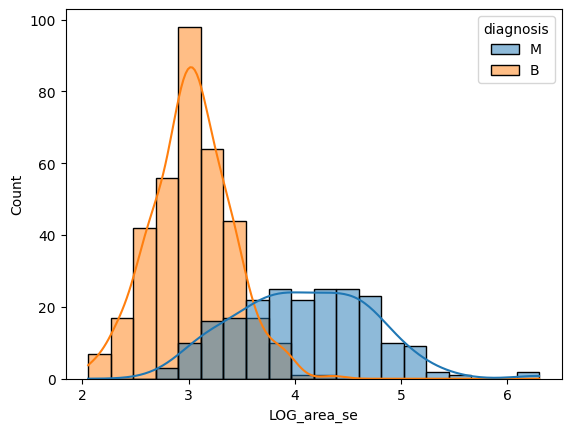

In [459]:
df['LOG_area_se'] = np.log1p(df['area_se'])  # Add 1 to avoid log(0) errors
sns.histplot(data=df, x='LOG_area_se', hue='diagnosis', kde=True)
plt.show()

In [460]:
df.drop(['area_se'], axis=1, inplace=True)

In [461]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'LOG_rad_area_per_mean',
       'LOG_area_rad_pworst', 'LOG_rad_per_se', 'LOG_area_se'],
      dtype='object')

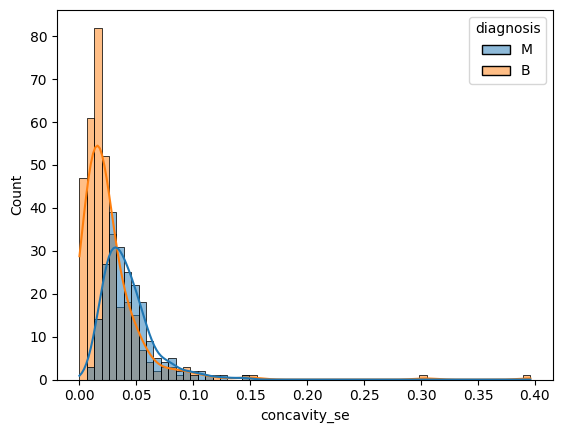

In [462]:
sns.histplot(data=df, x='concavity_se', hue='diagnosis', kde=True)
plt.show()

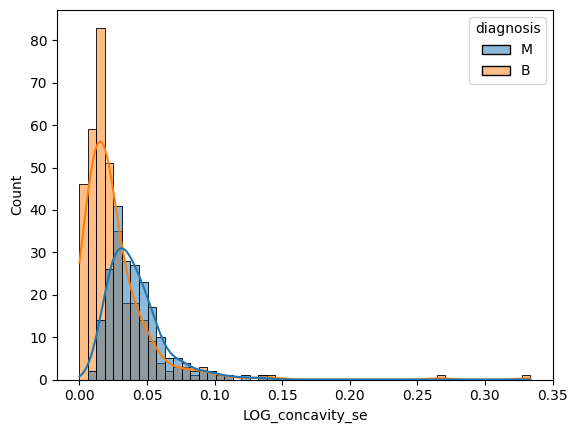

In [463]:
df['LOG_concavity_se'] = np.log1p(df['concavity_se'])  # Add 1 to avoid log(0) errors
sns.histplot(data=df, x='LOG_concavity_se', hue='diagnosis', kde=True)
plt.show()

In [464]:
df.drop(['concavity_se'], axis=1, inplace=True)

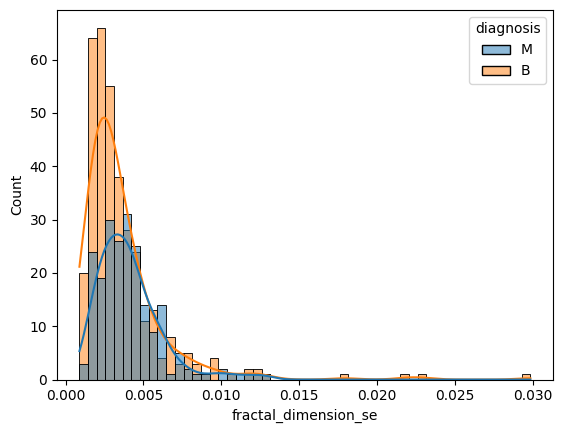

In [465]:
sns.histplot(data=df, x='fractal_dimension_se', hue='diagnosis', kde=True)
plt.show()

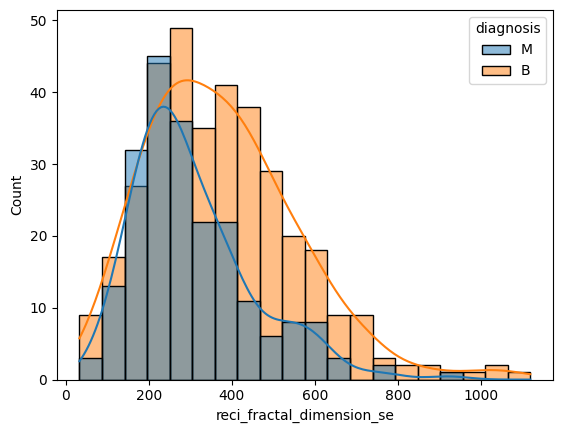

In [466]:
df['reci_fractal_dimension_se'] = 1/(df['fractal_dimension_se'])
sns.histplot(data=df, x='reci_fractal_dimension_se', hue='diagnosis', kde=True)
plt.show()

In [467]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'LOG_rad_area_per_mean',
       'LOG_area_rad_pworst', 'LOG_rad_per_se', 'LOG_area_se',
       'LOG_concavity_se', 'reci_fractal_dimension_se'],
      dtype='object')

In [468]:
df.drop(['fractal_dimension_se'], axis=1, inplace=True)

In [469]:
df.shape

(569, 26)

In [470]:
corr_matrix = df.corr(numeric_only=True,method='pearson')
corr_matrix = corr_matrix[corr_matrix > 0.90]

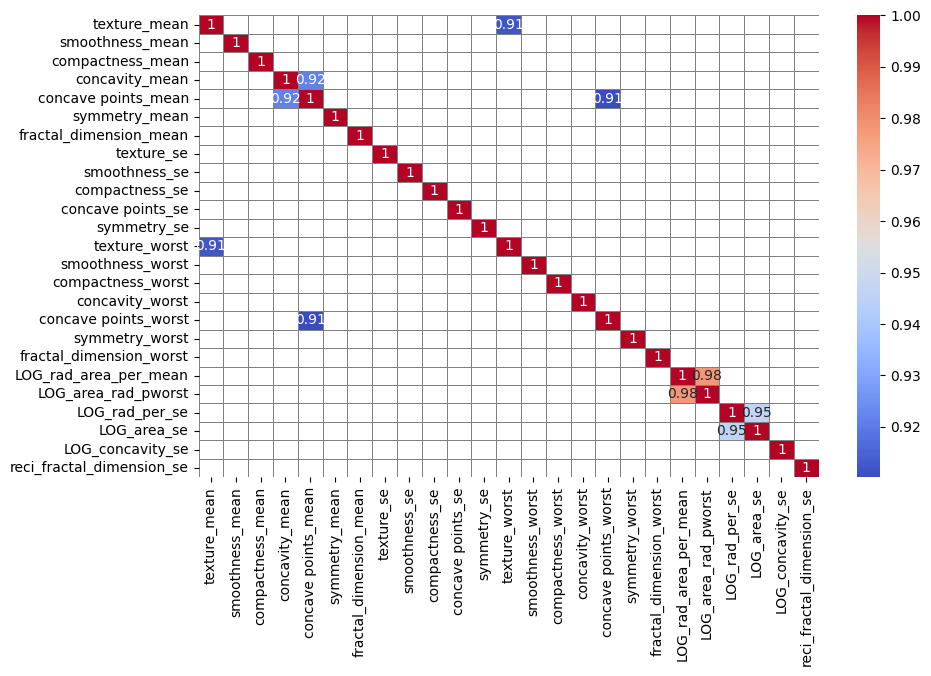

In [471]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=.5, linecolor='gray')
plt.show()

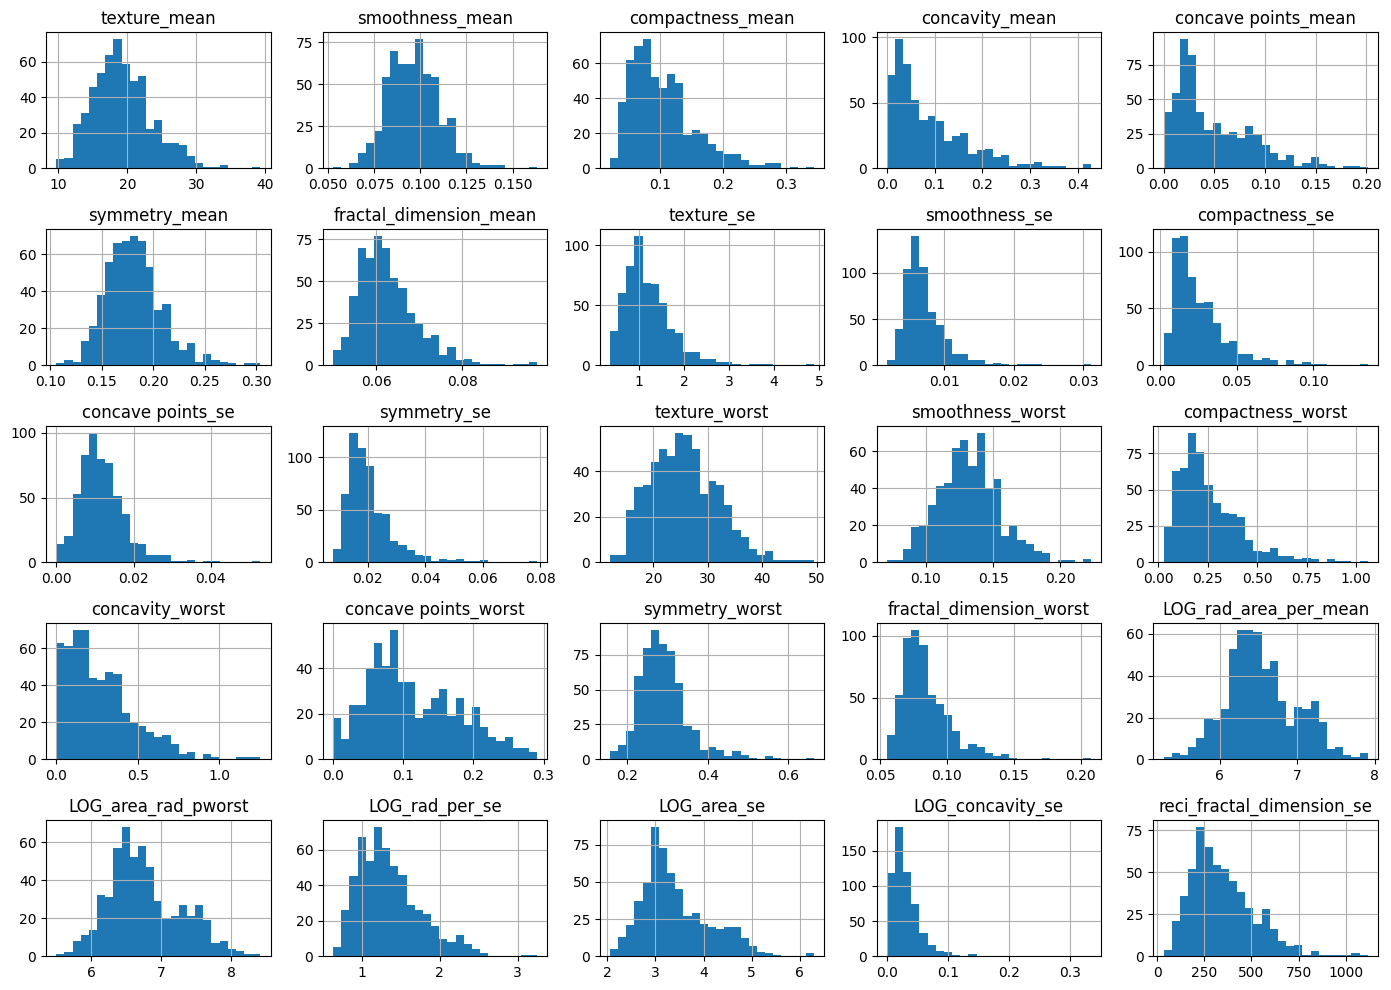

In [472]:
df.hist(bins=25, figsize=(14, 10))
plt.tight_layout()
plt.show()

## Data Pre Preprocessing

In [473]:
df.diagnosis.value_counts(normalize=True)

,proportion
diagnosis,
B,0.627417
M,0.372583


Dataset is slighlty Imbalanced

Encoding of dependant feature 'diagnosis'
- Malignant - 1
- Benign - 0

In [474]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## Feature Selection

In [475]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop, axis=1)

print(df.shape[1])

23


In [476]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se',
       'symmetry_se', 'texture_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'LOG_area_rad_pworst', 'LOG_area_se',
       'LOG_concavity_se', 'reci_fractal_dimension_se'],
      dtype='object')

After completing the process, 23 features were retained out of the original 33.

In [477]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [478]:
# Spliting dataset 80-20 propotion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling
We need to bring our feature values within a comparable range, while still maintaining their independence. For this we will use the fit_transform method on the training dataset. This method learns about our data (mean and variance) and then uses this information to transform the data into a zero mean, unit variance range. We use the same information to tranform the test data as well, instead of learning the test data as well, so that the model still is 'surprised' by the test data.

In [479]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Comparing Different Algoritms
We choose the machine learning model according to the problem we are trying to solve. Since our data is already labeled (Malignant/Benign), we will use the supervised learning approach. Two different kinds of problems in supervised learning are classification and regression. Since our aim is to categorize the data into malignant or benign, we are dealing with a classification problem.

1. Logistic Regression

In [480]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [481]:
y_pred = log_reg.predict(X_test)

In [482]:
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.989010989010989
0.9824561403508771
[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



2. KNN (K- Nearest Neighbour)

In [483]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [484]:
y_pred = knn.predict(X_test)

In [485]:
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9758241758241758
0.9473684210526315
[[69  2]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



3. SVC (Support Vector Classifier)

In [486]:
#Hyperparameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc= SVC(probability=True)

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [487]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [488]:
grid_search.best_score_

0.9802197802197803

In [489]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01, probability=True)

In [490]:
y_pred = svc.predict(X_test)

In [491]:
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9934065934065934
0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



4. Decision Tree Classifier

In [492]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [493]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 22,
 'min_samples_leaf': 5,
 'min_samples_split': 9,
 'splitter': 'random'}

In [494]:
grid_search_dt.best_score_

0.9604395604395604

In [495]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter = 'random')

In [496]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [497]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9714285714285714
0.9298245614035088
[[69  2]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        71
           1       0.95      0.86      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



5. Random Forest Classifier

In [498]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [499]:
y_pred = rand_clf.predict(X_test)

In [500]:
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9978021978021978
0.956140350877193
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



6. Gradient Boosting Classifier

In [501]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [502]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [503]:
grid_search_gbc.best_score_

0.9560147615735374

In [504]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

In [505]:
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.956140350877193
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



7. XGB Classifier

In [506]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [507]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9934065934065934
0.956140350877193
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [508]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,98.25
2,SVM,97.37
4,Random Forest Classifier,95.61
5,Gradient Boosting Classifier,95.61
6,XgBoost,95.61
1,KNN,94.74
3,Decision Tree Classifier,92.98


In [509]:
import pickle
model = log_reg
pickle.dump(model, open("brest_cancer.pkl","wb"))

## Model Comparison

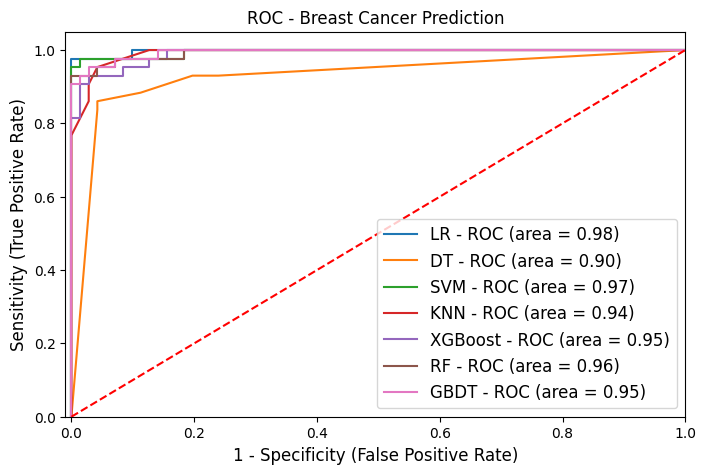

In [510]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[98.25, 92.97999999999999, 97.37, 94.74000000000001, 95.61, 95.61, 95.61]
[98.13, 94.64, 96.97, 93.94, 95.1, 95.81, 95.1]


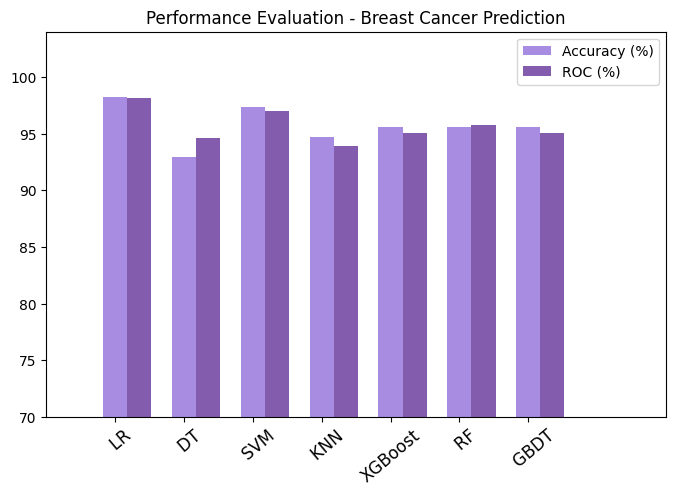

In [515]:
models = [
{
    'label': 'Logistic Regression',
    'model': log_reg,
},
{
    'label': 'Decision Tree',
    'model': dtc,
},
{
    'label': 'Support Vector Classifier',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'Random Forest Classifier',
    'model': rand_clf,
},
{
    'label': 'Gradient Boost',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4),
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

###**Logistic regression** performed exceptionally well, achieving a score of **98.25%.** This high level of accuracy demonstrates the model's effectiveness in capturing the underlying patterns in the data. The results highlight logistic regression's suitability for this task, providing robust and reliable predictions. Future work may involve fine-tuning the model further or exploring other algorithms to potentially enhance performance even more.